In [1]:
#Get all packages needed
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
warnings.filterwarnings("ignore")

In [2]:
xls = pd.ExcelFile('data_insight.xlsx')
df = pd.read_excel(xls, 'CustomerDemographic')
#list(df)

In [3]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [5]:
df=df.drop('default',axis=1)
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [6]:
type(df['DOB'][143])
lon=len(df["DOB"])
for i in range(0,3999):
    if (type(df["DOB"][i])==str):
        if(df["DOB"][i]!="No Date"):
            df["DOB"][i] = pd.to_datetime(df["DOB"][i])

 

In [7]:
 import datetime as dt
import numpy as np
import pandas as pd
nmb=len(df["DOB"])
df["Age"]=0
for i in range(0,nmb):
    if df["DOB"][i]!='No Date':
    #dtime[i]= pd.to_datetime(df["DOB"][i])
        tl = len(df["DOB"][i].ctime().split(" "))
        year=df["DOB"][i].ctime().split(" ")[tl-1]
        #print(df["DOB"][i].ctime().split(" ")[tl-1])
        df["Age"][i]=int(2020-int(year))
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,40
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,66
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7.0,59
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,43


In [8]:
Fq1=[]
Mq1=[]
Fq2=[]
Mq2=[]
Fq3=[]
Mq3=[]
Fq4=[]
Mq4=[]
j=0
for i in df["gender"]:
    age=df["Age"][j]
    if (i=="Female" or i=="F") and age!=0:
        if((age>25)and(age<48)):
            Fq1.append(age)
        if((age>=48)and(age<=59)):
            Fq2.append(age)
        if(age>59):
            Fq3.append(age)
        if((age<=25)):
            Fq4.append(age)
    if (i=="Male" or i=="M") and age!=0:
        if((age>25)and(age<48)):
            Mq1.append(age)
        if((age>=48)and(age<=59)):
            Mq2.append(age)
        if(age>59):
            Mq3.append(age)
        if((age<=25)):
            Mq4.append(age)
  
    j+=1


[1113, 1029, 450, 382, 244, 240, 231, 222]


([<matplotlib.axis.XTick at 0x7f3af1d57d90>,
 <a list of 8 Text xticklabel objects>)

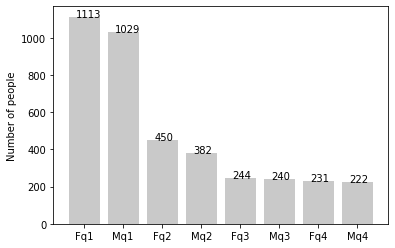

In [9]:
graphgen = [len(Fq1), len(Mq1), len(Fq2), len(Mq2), len(Fq3), len(Mq3), len(Fq4), len(Mq4)]
print(graphgen)

colorr = (0.7,0.7,0.7,0.7)

x2 = np.arange(8)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Number of people')
plt.bar(x2, graphgen, color = colorr)
for i in range(len(graphgen)):
    plt.text(x = i-0.2, y = graphgen[i]+0.1, s = graphgen[i], size = 10)

plt.xticks(x2, ('Fq1', "Mq1", 'Fq2', "Mq2", 'Fq3', "Mq3", 'Fq4', "Mq4"))

In [10]:
gender=[0,0,0,0,0,0]
bikes=[0,0,0,0,0,0]
for i in range(0,3999):
    if df["gender"][i]=="Female":
        gender[0]+=1
        bikes[0]=bikes[0]+df["past_3_years_bike_related_purchases"][i]
    if df["gender"][i]=="F":
        gender[1]+=1
        bikes[1]=bikes[1]+df["past_3_years_bike_related_purchases"][i]
    if df["gender"][i]=="Male":
        gender[2]+=1
        bikes[2]=bikes[2]+df["past_3_years_bike_related_purchases"][i]
    if df["gender"][i]=="M":
        gender[3]+=1
        bikes[3]=bikes[3]+df["past_3_years_bike_related_purchases"][i]
    if df["gender"][i]=="U":
        gender[4]+=1
        bikes[4]=bikes[4]+df["past_3_years_bike_related_purchases"][i]
    if df["gender"][i]=="Unknowen":
        gender[5]+=1
        bikes[5]=bikes[5]+df["past_3_years_bike_related_purchases"][i]
    

 

([<matplotlib.axis.XTick at 0x7f3af1cc77d0>,
 <a list of 3 Text xticklabel objects>)

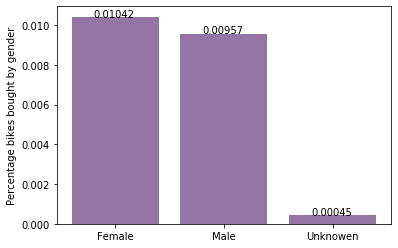

In [11]:
total=df["past_3_years_bike_related_purchases"].sum()
grap=[round((gender[0]+gender[1])/total,5),round((gender[2]+gender[3])/total,5),round((gender[4]+gender[5])/total,5)]
orr = (0.3,0.1,0.4,0.6)

x2 = np.arange(3)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Percentage bikes bought by gender')
plt.bar(x2,grap,color = orr)
for i in range(len(grap)):
    plt.text(x = i-0.2, y = grap[i], s = grap[i], size = 10)

plt.xticks(x2, ('Female', "Male", 'Unknowen'))
 

([<matplotlib.axis.XTick at 0x7f3b1f1d2c10>,
 <a list of 6 Text xticklabel objects>)

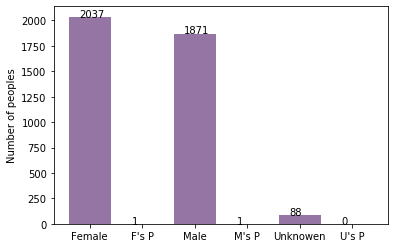

In [12]:
grap=[gender[0],gender[1],gender[2],gender[3],gender[4],gender[5]]
orr = (0.3,0.1,0.4,0.6)

x2 = np.arange(6)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Number of peoples')
plt.bar(x2,grap,color = orr)
for i in range(len(grap)):
    plt.text(x = i-0.2, y = grap[i], s = grap[i], size = 10)

plt.xticks(x2, ('Female',"F's P", "Male","M's P", 'Unknowen',"U's P"))

In [42]:
df["job_industry_category"].fillna("No Category", inplace=True)
df["job_industry_category"].isnull().sum()
num=[]
catgory=df["job_industry_category"].value_counts()
for i in catgory:
    num.append(i)

([<matplotlib.axis.XTick at 0x7f3af08f2290>,
 <a list of 10 Text xticklabel objects>)

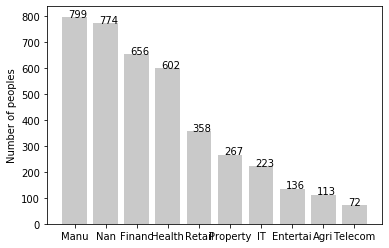

In [55]:
orr = (0.7,0.7,0.7,0.7)
x2 = np.arange(10)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Number of peoples')
plt.bar(x2,num,color = orr)
for i in range(len(num)):
    plt.text(x = i-0.2, y = num[i], s = num[i], size = 10)

plt.xticks(x2, ("Manu","Nan", "Financ", "Health", "Retail", "Property", "IT", "Entertai", "Agri", "Telecom"))


In [57]:
df["wealth_segment"].isnull().sum()
df["wealth_segment"].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [66]:
j=0
Mq={"q1":[],"q2":[],"q3":[],"q4":[]}
Hq={"q1":[],"q2":[],"q3":[],"q4":[]}
Aq={"q1":[],"q2":[],"q3":[],"q4":[]}
for i in df["wealth_segment"]:
    age=df["Age"][j]
    if (i=="Mass Customer") and age!=0:
        if((age>25)and(age<48)):
            Mq["q1"].append(age)
        if((age>=48)and(age<=59)):
            Mq["q2"].append(age)
        if(age>59):
            Mq["q3"].append(age)
        if((age<=25)):
            Mq["q4"].append(age)
    if (i=="High Net Worth") and age!=0:
        if((age>25)and(age<48)):
            Hq["q1"].append(age)
        if((age>=48)and(age<=59)):
            Hq["q2"].append(age)
        if(age>59):
            Hq["q3"].append(age)
        if((age<=25)):
            Hq["q4"].append(age)
    if (i=="Affluent Customer") and age!=0:
        if((age>25)and(age<48)):
            Aq["q1"].append(age)
        if((age>=48)and(age<=59)):
            Aq["q2"].append(age)
        if(age>59):
            Aq["q3"].append(age)
        if((age<=25)):
            Aq["q4"].append(age)
  
    j+=1
M=[len(Mq["q1"]),len(Mq["q2"]),len(Mq["q3"]),len(Mq["q4"])]
H=[len(Hq["q1"]),len(Hq["q2"]),len(Hq["q3"]),len(Hq["q4"])]
A=[len(Aq["q1"]),len(Aq["q2"]),len(Aq["q3"]),len(Aq["q4"])]
print(A)

[516, 213, 110, 124]


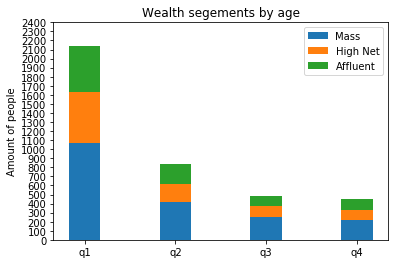

In [70]:
bars = np.add(M, H).tolist()
r = [0,1,2,3,4]

ind   = np.arange(4) # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind,M , width)
p2 = plt.bar(ind,H , width,  bottom=M)
p3 = plt.bar(ind,A , width,  bottom=bars)

plt.ylabel('Amount of people')
plt.title('Wealth segements by age')
plt.xticks(ind, ('q1', 'q2', 'q3', 'q4'))
plt.yticks(np.arange(0, 2500, 100))
plt.legend((p1[0], p2[0], p3[0]), ('Mass', 'High Net', 'Affluent'))

plt.show()

In [73]:
df2 = pd.read_excel(xls, 'CustomerAddress')
df2.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [76]:
df3 = pd.merge(df, df2, on = 'customer_id')
df3.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,40,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7.0,59,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,No Category,Affluent Customer,N,Yes,8.0,43,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,Yes,13.0,54,9 Oakridge Court,3216,VIC,Australia,9


In [80]:
df3["state"].value_counts()
 

NSW                2052
VIC                 939
QLD                 837
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [81]:
df3["owns_car"].value_counts()

Yes    2021
No     1975
Name: owns_car, dtype: int64

In [83]:
Ny=[]
Nn=[]
Vy=[]
Vn=[]
Qy=[]
Qn=[]
j=0
for i in df3["owns_car"]:
    s=df3["state"][j]
    if i=="Yes":
        if(s=="NSW" or s=="New South Wales"):
            Ny.append(s)
        if(s=="VIC" or s=="Victoria"):
            Vy.append(s)
        if s=="QLD":
            Qy.append(s)
    if i=="No":
        if(s=="NSW" or s=="New South Wales"):
            Nn.append(s)
        if(s=="VIC" or s=="Victoria"):
            Vn.append(s)
        if s=="QLD":
            Qn.append(s)
    j+=1
owned=[len(Ny),len(Nn),len(Vy),len(Vn),len(Qy),len(Qn)]
print(owned)
        
    

[1100, 1038, 502, 519, 419, 418]


([<matplotlib.axis.XTick at 0x7f3af03d1490>,
 <a list of 6 Text xticklabel objects>)

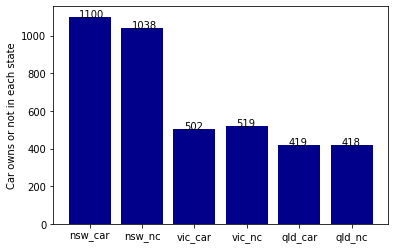

In [86]:
x2 = np.arange(6)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Car owns or not in each state')
plt.bar(x2,owned,color = 'darkblue')
for i in range(len(owned)):
    plt.text(x = i-0.2, y = owned[i], s = owned[i], size = 10)

plt.xticks(x2, ('nsw_car',"nsw_nc", "vic_car","vic_nc", 'qld_car',"qld_nc"))